In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import kagglehub
from PIL import Image
import matplotlib.pyplot as plt

# Path of the file inside the dataset
file_path = "Data_Entry_2017.csv"

# Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "nih-chest-xrays/data",
    file_path,
    # optional: pandas_kwargs={"nrows": 10000}, etc.
)

print("Shape:", df.shape)
print("First 5 records:")
print(df.head())


/var/folders/gn/8m537hpn0vgggtr35s7vfr380000gn/T/ipykernel_23288/1343979622.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


Shape: (112120, 12)
First 5 records:
        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0             

In [3]:
print(df.columns)

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')


In [4]:
from collections import Counter

all_labels = []
for labels in df["Finding Labels"]:
    for lab in labels.split("|"):
        all_labels.append(lab.strip())

label_counts = Counter(all_labels)
print(label_counts)

Counter({'No Finding': 60361, 'Infiltration': 19894, 'Effusion': 13317, 'Atelectasis': 11559, 'Nodule': 6331, 'Mass': 5782, 'Pneumothorax': 5302, 'Consolidation': 4667, 'Pleural_Thickening': 3385, 'Cardiomegaly': 2776, 'Emphysema': 2516, 'Edema': 2303, 'Fibrosis': 1686, 'Pneumonia': 1431, 'Hernia': 227})


In [5]:
df["HasFinding"] = df["Finding Labels"] != "No Finding"
print(df["HasFinding"].value_counts(normalize=True))

HasFinding
False    0.538361
True     0.461639
Name: proportion, dtype: float64


In [6]:
print(df["Patient Age"].describe())

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64


In [7]:
def age_bucket(age):
    if age < 18:
        return "child"
    elif age < 40:
        return "young_adult"
    elif age < 65:
        return "middle_aged"
    else:
        return "elderly"

df["AgeBucket"] = df["Patient Age"].apply(age_bucket)
print(df["AgeBucket"].value_counts(normalize=True))


AgeBucket
middle_aged    0.536167
young_adult    0.273760
elderly        0.143329
child          0.046745
Name: proportion, dtype: float64


In [8]:
print(df["Patient Gender"].value_counts(normalize=True))


Patient Gender
M    0.56493
F    0.43507
Name: proportion, dtype: float64


Using dataset at: /Users/graysonrichard/.cache/kagglehub/datasets/nih-chest-xrays/data/versions/3
Normal image: 00000002_000.png | Label: No Finding
Abnormal image: 00000001_000.png | Label: Cardiomegaly


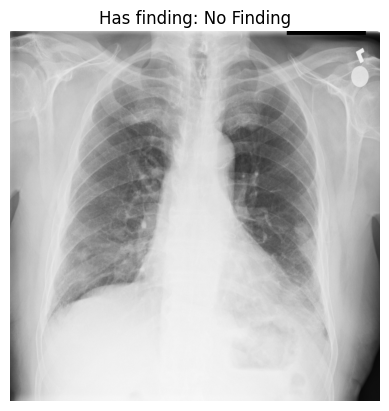

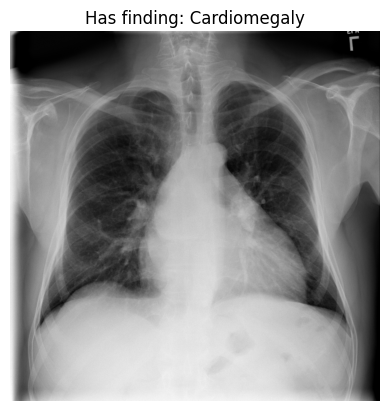

In [11]:
dataset_path = kagglehub.dataset_download("nih-chest-xrays/data")
print("Using dataset at:", dataset_path)

row_normal = df[df["HasFinding"] == False].iloc[0]
row_abnormal = df[df["HasFinding"] == True].iloc[0]

print("Normal image:", row_normal["Image Index"], "| Label:", row_normal["Finding Labels"])
print("Abnormal image:", row_abnormal["Image Index"], "| Label:", row_abnormal["Finding Labels"])

def find_image_path(root, filename):
    for dirpath, _, files in os.walk(root):
        if filename in files:
            return os.path.join(dirpath, filename)
    raise FileNotFoundError(f"{filename} not found under {root}")

def show_image(row, title_prefix):
    img_idx = row["Image Index"]
    img_path = find_image_path(dataset_path, img_idx)

    img = Image.open(img_path)
    plt.imshow(img, cmap="gray")
    plt.title(f"{'Has finding'}: {row['Finding Labels']}")
    plt.axis("off")
    plt.show()

# One without anomaly
show_image(row_normal, "No Finding")

# One with anomaly
show_image(row_abnormal, "Has Finding")
